# Import libraries:

In [1]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
#pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import operator

In [2]:
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns',130)

# Load data

In [3]:
train_data = pd.read_csv("train_data (1).csv")
#test_data = pd.read_csv("test_data .csv")

In [4]:
train_data_raw = pd.read_csv("train_data (1).csv")


# Used functions

In [5]:
def plot_dist_col(column):
    '''plot dist curves for train and test data for the given column name'''
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.distplot(train_data[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(test_data[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['train', 'test'])
    plt.show()
    
def count_col(df,name, column):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    sns.countplot(x=column, data=df,
                  order=df[column].value_counts().index).set_title(column + name ,
                                                                           fontsize=16)
    plt.xticks(rotation=90)
    plt.show()
    
def plot_count_col(column):
    '''plot count plot for categorial column
    need to dividded to 2 curves
    '''
    count_col(train_data,' train data', column)
    count_col(test_data, ' test data', column)
    
def time_sub_units(the_df, date_col):
    the_df[date_col] = pd.to_datetime(the_df[date_col])
    the_df['year'] = the_df[date_col].dt.year.astype(np.uint16)
    the_df["month"] = the_df[date_col].dt.month.astype(np.uint8)
   # the_df["day"] = the_df[date_col].dt.day.astype(np.uint8)
   # the_df["hour"] = the_df[date_col].dt.hour.astype(np.uint8)
   # the_df["weekend"] = the_df[date_col].dt.weekday.astype(np.uint8)
    return the_df

def removing_rows_with_no_data(the_df, miss_percentage=0.6):
    print(the_df.shape)
    the_df.count_nonzero(the_df.isnull().mean(axis=1) > miss_percentage)
    the_df = the_df.loc[:, the_df.isnull().sum() < miss_percentage*the_df.shape[0]]
    print(the_df.shape)
    return (the_df)

def split_cols(the_df, col_name, operator):
    temp=the_df[col_name].str.split(operator, expand = True)
    col_a = col_name + ".1"
    col_b = col_name + ".2"
    the_df[col_a]=temp[0]
    the_df[col_b]=temp[1]
    #the_df.drop(columns =[col_name], inplace = True) 
    

def split_and_adding_cols(the_df, col_name, operator='+'):
    temp=the_df[col_name].str.split(operator, expand = True)
    new_col= col_name + "_num"
    the_df[new_col] = temp[0].astype('float32')+ temp[1].astype('float32')
       
    
'''
def clean_columns (the_df, miss_percentage=0.3):
   print(the_df.shape)
   # the_df.count_nonzero(the_df.isnull().mean(axis=0) > miss_percentage) 
    the_df = the_df.loc[:, the_df.isnull().sum() < miss_percentage*the_df.shape[0]]
    print(the_df.shape)
    return (the_df) 
'''
def drop_unused_cols(the_df, cols_name=[]):
    for cols in cols_neme:
        the_df = the_df.drop(clos, axis=1)
    return the_df       

def level_to_number(level):
    if level=='Low':
        return 1
    elif level=='Medium' :
        return 2
    elif level== 'High' :
        return 3
    else:
        return 0

def split_into_groups(num_users):
    if (num_users < 10) : return 0
    elif (num_users < 500): return 1
    else: return 2
    
x = train_data.Nationality.value_counts().apply(split_into_groups)


def change_nationality(nationality,country_size=x):
    if type(nationality) != type("str"): 
        return 'Other'
    if x[nationality]>0:
        return nationality
    else:
        return 'Other'    


def drop_unused_cols(the_df, cols_name=[]):
    for cols in cols_neme:
        the_df = the_df.drop(clos, axis=1)
    return the_df 


# Variables

In [6]:
t_data_forML_num=[]
t_data_forML_cat=[]

# EDA:

### Visualizing the patterns of missing values

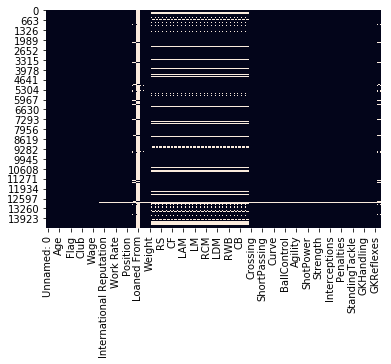

In [7]:
sns.heatmap(train_data.isnull(), cbar=False)

In [8]:
train_data.shape

(14565, 89)

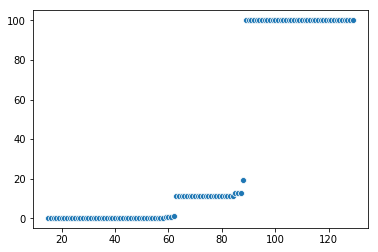

In [9]:
per=[]
for n in range (15,130):
    per.append((1 - train_data.dropna(thresh=n).shape[0]/ 14565)*100)
sns.scatterplot(x=range(15,130), y=per)

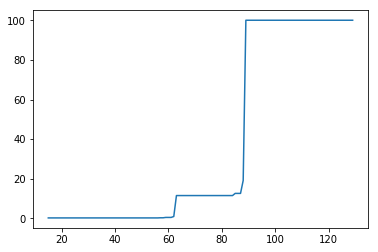

In [10]:
sns.lineplot(x=range(15,130), y=per)

In [11]:

print('rows WO wage:',100-(train_data.dropna(subset=['Wage']).shape[0]/14565)*100, '%  -->removing these rows')
print('Rows before removing:',train_data.shape[0])
train_data.dropna(subset=['Wage'], inplace=True)
print('Rows after removing:',train_data.shape[0])
print('Rows with wage=0:', train_data[train_data['Wage']==0].shape[0],'-->',
      train_data[train_data['Wage']==0].shape[0]/train_data.shape[0]*100, '%  -->removing these rows',)
print('Rows before removing:',train_data.shape[0])
train_data=train_data[train_data['Wage']>0]
print('Rows after removing:',train_data.shape[0])


rows WO wage: 0.0 %  -->removing these rows
Rows before removing: 14565
Rows after removing: 14565
Rows with wage=0: 195 --> 1.3388259526261586 %  -->removing these rows
Rows before removing: 14565
Rows after removing: 14370


Removing 1% from the data with large amount of columns missing:

In [12]:
print('n=60:',per[44])
print('n=62:',per[47])
print('n=63:',per[48])

print('n=62:',(1 - train_data.dropna(thresh=62).shape[0]/ 14370)*100)

n=60: 0.501201510470306
n=62: 0.968074150360454
n=63: 11.534500514933054
n=62: 0.7306889352818424


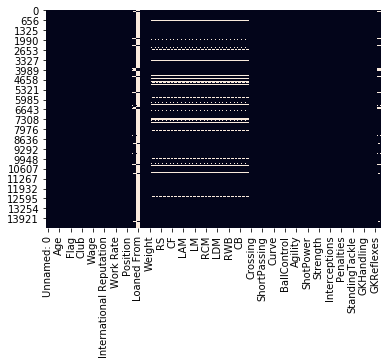

In [13]:
train_data.dropna(thresh=62, inplace= True) 
sns.heatmap(train_data.isnull(), cbar=False)

In [14]:
train_data.shape #14625/14565*100% =98%

(14265, 89)

Wages distribution:

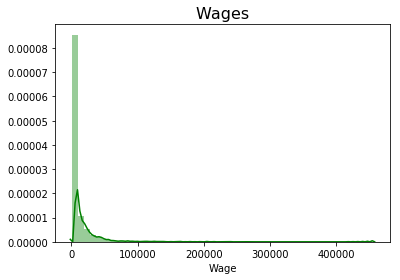

In [15]:
sns.distplot(train_data['Wage'], color='green').set_title('Wages', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Log_Wages')

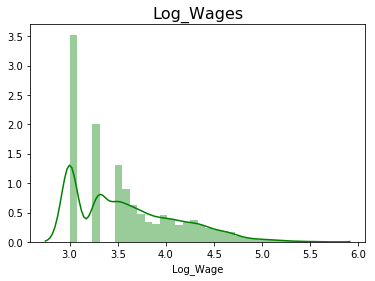

In [16]:
train_data['Log_Wage'] = np.log10(train_data['Wage']).astype('float32')
sns.distplot(train_data['Log_Wage'], color='green').set_title('Log_Wages', fontsize=16)

In [17]:
print('% of rows with log_wage > 5:', train_data[train_data['Log_Wage']>5].shape[0]/train_data.shape[0]*100, '%  --> removing these lines')
print('Rows before removing:',train_data.shape[0])
train_data=train_data[train_data['Log_Wage']<5]
print('Rows after removing:',train_data.shape[0])

% of rows with log_wage > 5: 1.0725552050473186 %  --> removing these lines
Rows before removing: 14265
Rows after removing: 14109


Text(0.5, 1.0, 'Log_Wages')

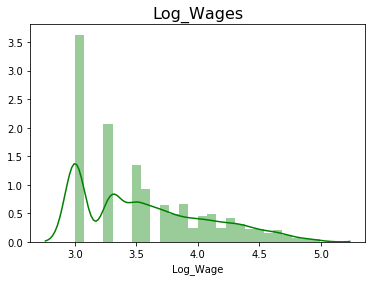

In [18]:
train_data['Log_Wage'] = np.log10(train_data['Wage']).astype('float32')
sns.distplot(train_data['Log_Wage'].dropna(), color='green').set_title('Log_Wages', fontsize=16)

In [19]:
print("Total number of removed rows:",14565-train_data.shape[0], 'rows -->', 100-train_data.shape[0]/14565*100, '%')

Total number of removed rows: 456 rows --> 3.130792996910401 %


In [20]:
train_data.shape

(14109, 90)

High-level overview

In [21]:
train_data.head()

Unnamed: 0      ID           Name  Age  \
0           1  184338    G. Bellusci   28   
1           2  215593        D. Kort   23   
2           3  179579       T. Nowak   32   
3           4  228009  Lee Gyu Seong   24   
4           5   49045        K. Boyd   34   

                                            Photo     Nationality  \
0  https://cdn.sofifa.org/players/4/19/184338.png           Italy   
1  https://cdn.sofifa.org/players/4/19/215593.png          Poland   
2  https://cdn.sofifa.org/players/4/19/179579.png          Poland   
3  https://cdn.sofifa.org/players/4/19/228009.png  Korea Republic   
4   https://cdn.sofifa.org/players/4/19/49045.png        Scotland   

                                   Flag  Overall  Potential  \
0   https://cdn.sofifa.org/flags/27.png       70         70   
1   https://cdn.sofifa.org/flags/37.png       68         75   
2   https://cdn.sofifa.org/flags/37.png       65         65   
3  https://cdn.sofifa.org/flags/167.png       57         62   
4   https://cdn.sofifa.org/flags/42.png       72         72   

                 Club                                        Club Logo  \
0             Palermo    https://cdn.sofifa.org/teams/2/light/1843.png   
1        Wisła Kraków    https://cdn.sofifa.org/teams/2/light/1873.png   
2  Zagłębie Sosnowiec  https://cdn.sofifa.org/teams/2/light/111089.png   
3    Sangju Sangmu FC    https://cdn.sofifa.org/teams/2/light/2055.png   
4          Kilmarnock      https://cdn.sofifa.org/teams/2/light/82.png   

      Value  Wage  Special Preferred Foot  International Reputation  \
0  EURO1.4M  3000     1694          Right                      1.00   
1  EURO1.3M  3000     1697          Right                      1.00   
2  EURO425K  2000     1790           Left                      1.00   
3  EURO140K  1000     1516          Right                      1.00   
4  EURO1.6M  7000     1703          Right                      1.00   

   Weak Foot  Skill Moves       Work Rate Body Type Real Face Position  \
0       3.00         2.00    High/ Medium    Normal        No      RCB   
1       3.00         3.00  Medium/ Medium      Lean        No      RDM   
2       3.00         3.00    High/ Medium    Stocky        No      CAM   
3       3.00         3.00    High/ Medium    Normal        No      CAM   
4       4.00         2.00     Medium/ Low    Stocky       Yes       ST   

   Jersey Number     Joined Loaned From Contract Valid Until Height  Weight  \
0           2.00   3-Aug-17         NaN                 2020    6'0  176lbs   
1           7.00  23-Jun-18         NaN                 2019    5'9  143lbs   
2           6.00   1-Jul-16         NaN                 2019    5'7  159lbs   
3          37.00   1-Jan-15         NaN                 2019    5'8  146lbs   
4           9.00   1-Jul-15         NaN                 2019    6'1  183lbs   

     LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM  \
0  54+2  54+2  54+2  52+2  54+2  54+2  54+2  52+2  54+2  54+2  54+2  54+2   
1  60+2  60+2  60+2  64+2  65+2  65+2  65+2  64+2  66+2  66+2  66+2  64+2   
2  59+2  59+2  59+2  62+2  61+2  61+2  61+2  62+2  63+2  63+2  63+2  63+2   
3  49+2  49+2  49+2  55+2  54+2  54+2  54+2  55+2  56+2  56+2  56+2  57+2   
4  70+2  70+2  70+2  62+2  65+2  65+2  65+2  62+2  63+2  63+2  63+2  60+2   

    LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB  \
0  58+2  58+2  58+2  54+2  61+2  66+2  66+2  66+2  61+2  63+2  68+2  68+2   
1  63+2  63+2  63+2  64+2  53+2  52+2  52+2  52+2  53+2  50+2  45+2  45+2   
2  63+2  63+2  63+2  63+2  60+2  60+2  60+2  60+2  60+2  58+2  56+2  56+2   
3  55+2  55+2  55+2  57+2  53+2  52+2  52+2  52+2  53+2  52+2  48+2  48+2   
4  58+2  58+2  58+2  60+2  44+2  48+2  48+2  48+2  44+2  42+2  46+2  46+2   

    RCB    RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
0  68+2  63+2     38.00      40.00            64.00         60.00    26.00   
1  45+2  50+2     53.00      55.00            49.00         67.0

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14109 entries, 0 to 14564
Data columns (total 90 columns):
Unnamed: 0                  14109 non-null int64
ID                          14109 non-null int64
Name                        14109 non-null object
Age                         14109 non-null int64
Photo                       14109 non-null object
Nationality                 14109 non-null object
Flag                        14109 non-null object
Overall                     14109 non-null int64
Potential                   14109 non-null int64
Club                        14109 non-null object
Club Logo                   14109 non-null object
Value                       14109 non-null object
Wage                        14109 non-null int64
Special                     14109 non-null int64
Preferred Foot              14109 non-null object
International Reputation    14109 non-null float64
Weak Foot                   14109 non-null float64
Skill Moves                 14109 non-null flo

In [23]:
train_data.describe(include='all')

Unnamed: 0         ID          Name       Age  \
count    14,109.00  14,109.00         14109 14,109.00   
unique         nan        nan         13456       nan   
top            nan        nan  J. Rodríguez       nan   
freq           nan        nan             6       nan   
mean      7,294.71 214,493.63           NaN     25.08   
std       4,206.44  30,011.73           NaN      4.67   
min           1.00      80.00           NaN     16.00   
25%       3,658.00 200,671.00           NaN     21.00   
50%       7,301.00 222,077.00           NaN     25.00   
75%      10,935.00 236,677.00           NaN     28.00   
max      14,565.00 246,620.00           NaN     45.00   

                                                 Photo Nationality  \
count                                            14109       14109   
unique                                           14109         157   
top     https://cdn.sofifa.org/players/4/19/214917.png     England   
freq                                                 1        1312   
mean                                               NaN         NaN   
std                                                NaN         NaN   
min                                                NaN         NaN   
25%                                                NaN         NaN   
50%                                                NaN         NaN   
75%                                                NaN         NaN   
max                                                NaN         NaN   

                                       Flag   Overall  Potential  \
count                                 14109 14,109.00  14,109.00   
unique                                  157       nan        nan   
top     https://cdn.sofifa.org/flags/14.png       nan        nan   
freq                                   1312       nan        nan   
mean                                    NaN     66.04      71.15   
std                                     NaN      6.69       5.97   
min                                     NaN     46.00      48.00   
25%                                     NaN     62.00      67.00   
50%                                     NaN     66.00      71.00   
75%                                     NaN     71.00      75.00   
max                                     NaN     90.00      93.00   

                      Club                                        Club Logo  \
count                14109                                            14109   
unique                 651                                              651   
top     Fortuna Düsseldorf  https://cdn.sofifa.org/teams/2/light/110636.png   
freq                    31                                               31   
mean                   NaN                                              NaN   
std                    NaN                                              NaN   
min                    NaN                                              NaN   
25%                    NaN                                              NaN   
50%                    NaN                                              NaN   
75%                    NaN                                              NaN   
max                    NaN                                              NaN   

           Value      Wage   Special Preferred Foot  International Reputation  \
count      14109 14,109.00 14,109.00          14109                 14,109.00   
unique       169       nan       nan              2                       nan   
top     EURO1.1M       nan       nan          Right                       nan   
freq         340       nan       nan          10821                       nan   
mean         NaN  8,155.93  1,595.80            NaN                      1.09   
std          NaN 12,800.09    268.79            NaN                      0.34   
min          NaN  1,000.00    731.00            NaN                      1.00   
25%          NaN  1,000.00  1,459.00            NaN                 

In [24]:
print('unique row by ID:',train_data['ID'].is_unique)

unique row by ID: True


In [25]:
train_data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [26]:
train_data.shape

(14109, 90)

Low-level overview

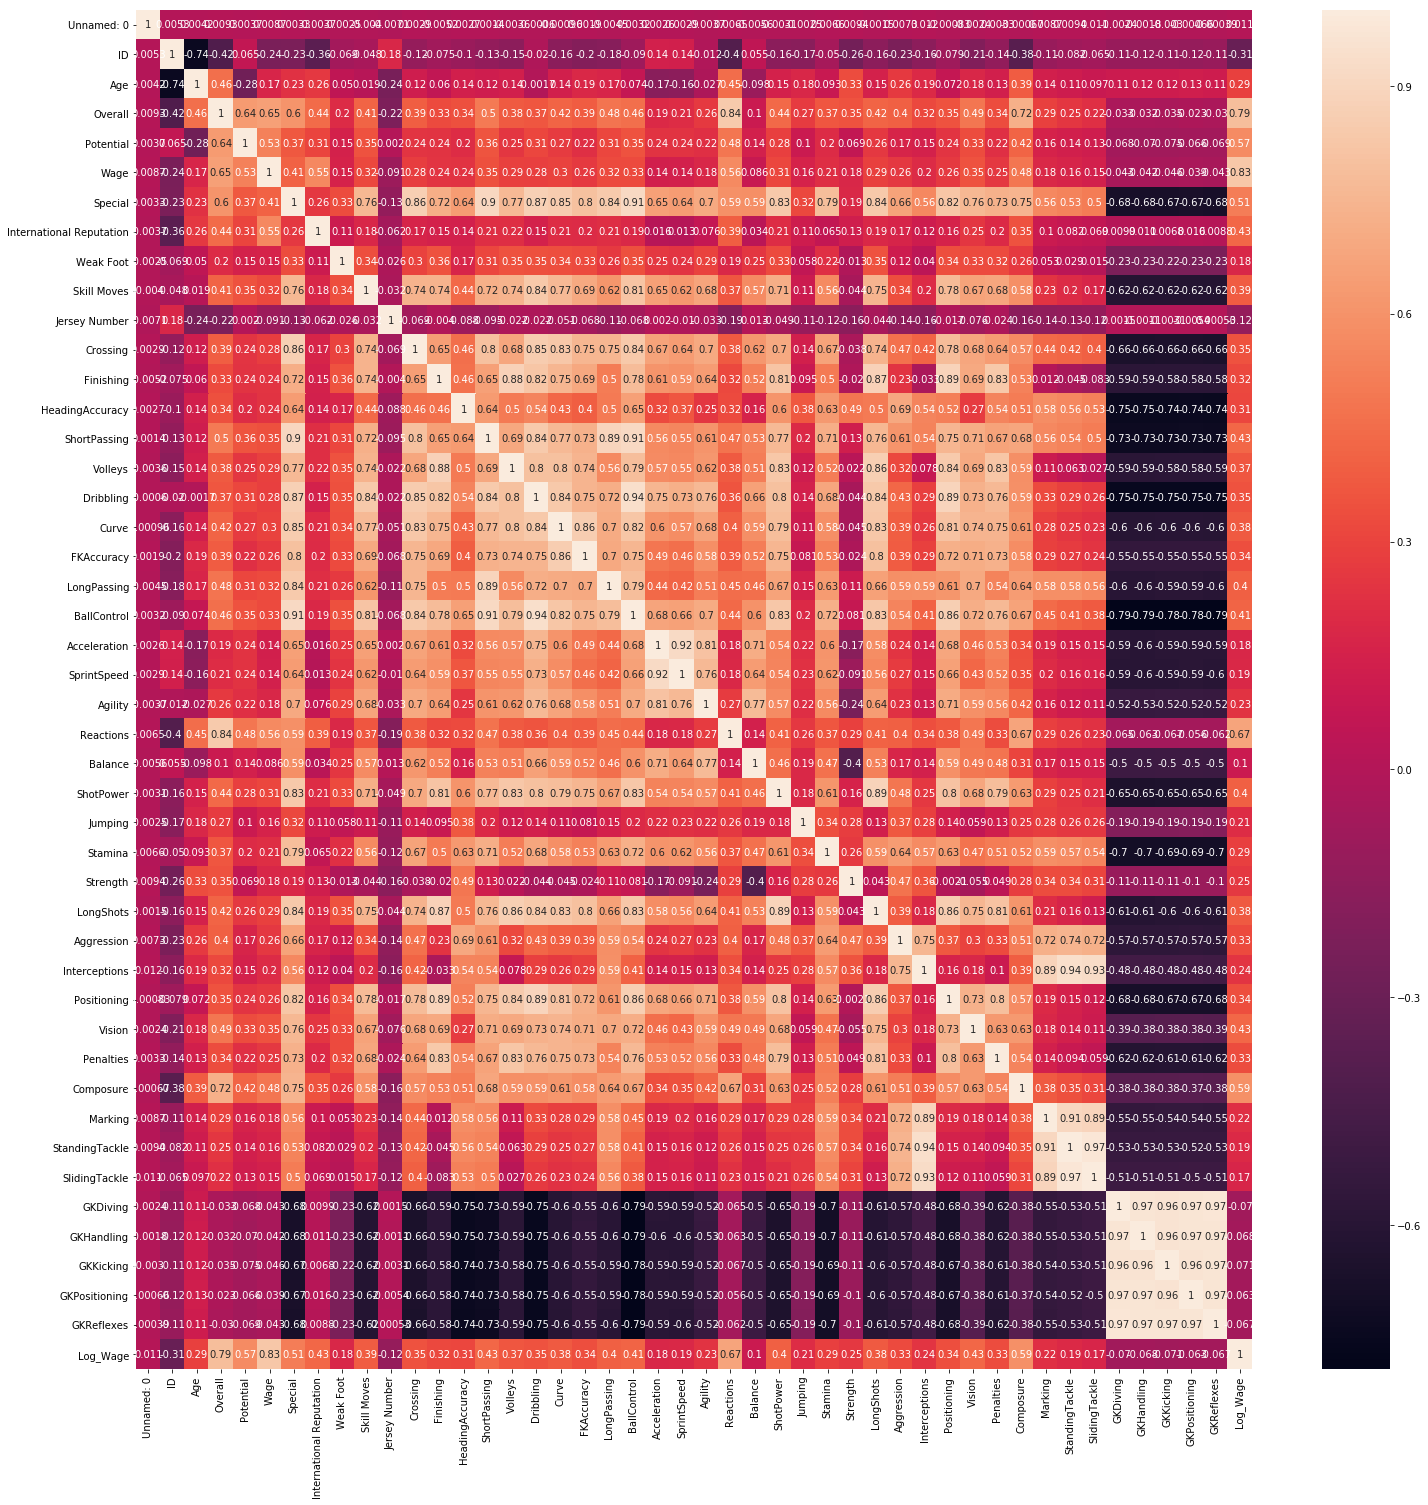

In [27]:
numeric_train_data = train_data.select_dtypes(include=['number'])
#numeric_train_data.head()
fig=plt.figure(figsize=(25,25))
sns.heatmap(numeric_train_data.corr(), annot=True)

### 2&4 Removed:  'Photo','Flag', 


In [28]:
print(train_data.shape)
train_data.drop(['Photo','Flag'], axis=1, inplace=True)
print(train_data.shape)

(14109, 90)
(14109, 88)


### 3:  Nationality 

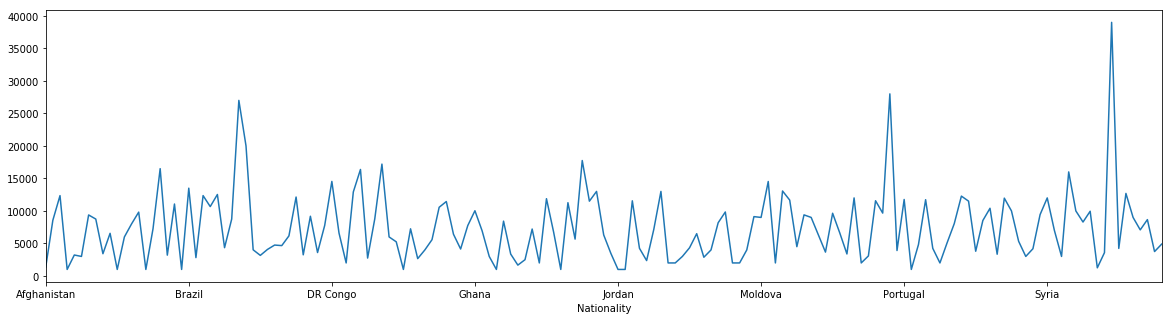

In [29]:
fig= plt.figure(figsize=(20,5))
train_data.groupby('Nationality').mean()['Wage'].plot()

 ### 5&6: Overall & Potential 
 Potential >= Overall

Text(0.5, 1.0, 'Overall & Potential')

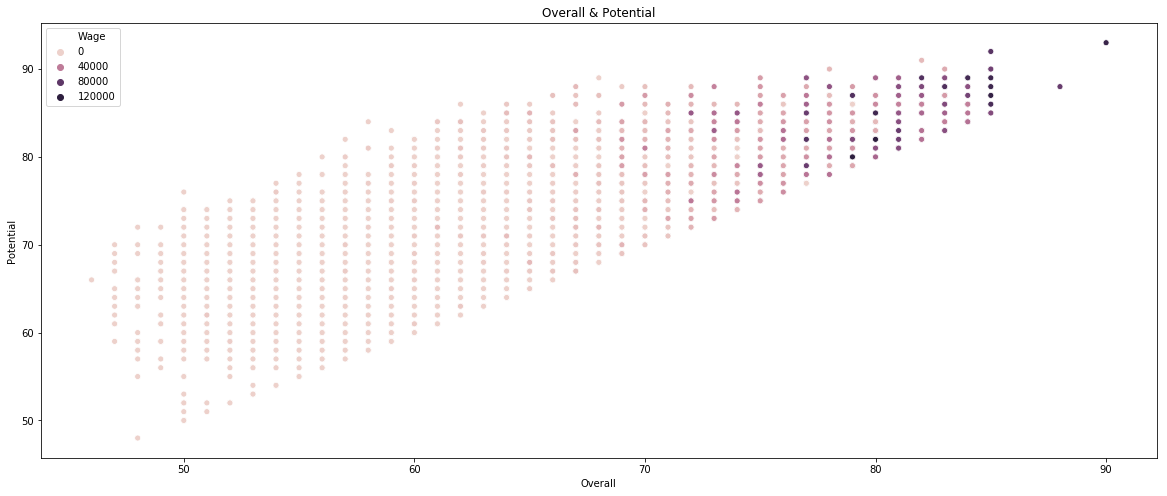

In [30]:
fig= plt.figure(figsize=(20,8))
sns.scatterplot(x=train_data['Overall'], y=train_data['Potential'], hue=train_data['Wage'])
plt.title('Overall & Potential')

 ### 7&8: Club & Club Logo


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

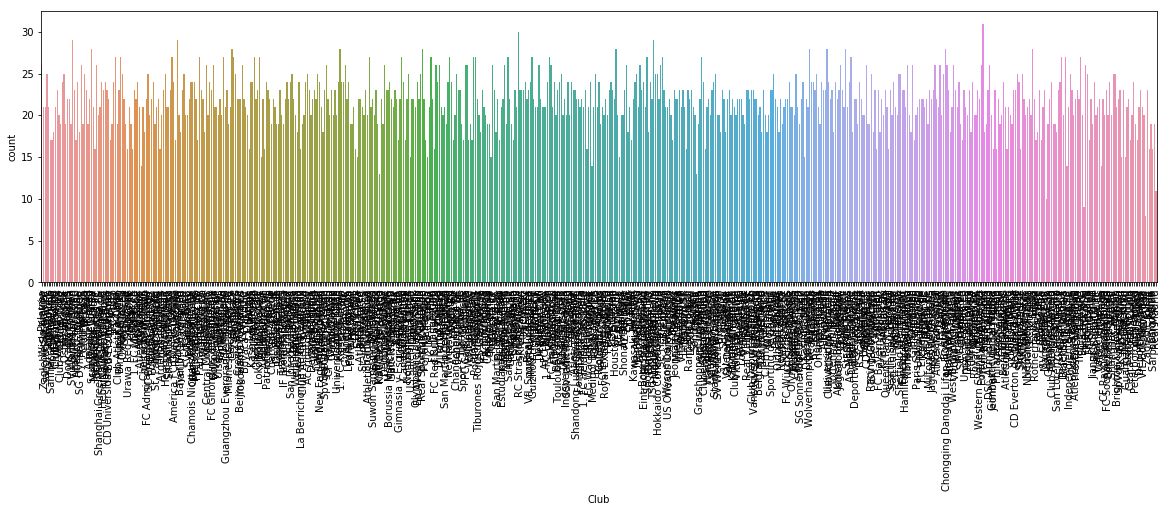

In [31]:
#train_data['Club'].value_counts()
fig= plt.figure(figsize=(20,5))
sns.countplot(x='Club', data=train_data) #order=train_data['Club'].value_counts().index
plt.xticks(rotation=90)

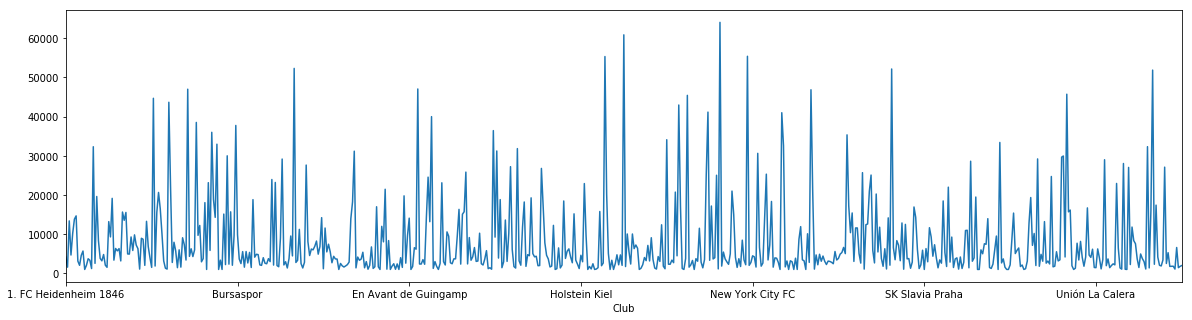

In [32]:
fig= plt.figure(figsize=(20,5))
train_data.groupby('Club').mean()['Wage'].plot()

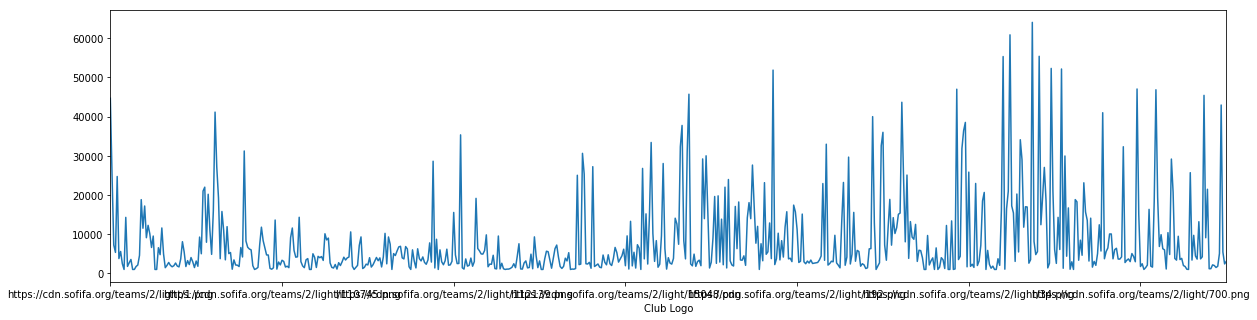

In [33]:
fig= plt.figure(figsize=(20,5))
train_data.groupby('Club Logo').mean()['Wage'].plot()

 ### 9: Value
The str is EURO + num + K or M

In [34]:
def coef_to_number(value):
    
    if value[-1]== 'M':
        return 1000000
    elif value[-1] == 'K':
        return 1000
    else:
        return 1
def value_to_number(value):
    if len(value) ==0 or len(value)<6:
        return 0
    else:
        coef = coef_to_number(value)
    number = float(value[4:len(value)-1])
    return(number*coef)
    
train_data["Value_Num"] = train_data['Value'].apply(lambda x: np.log10(value_to_number(x)).astype('float32'))  #np.log10(train_data['Wage']).astype('float32')
#train_data[['Value','Value_Num' ]]

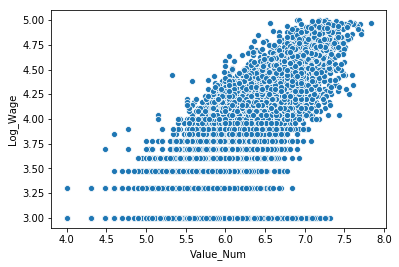

In [35]:
sns.scatterplot(x= 'Value_Num', y="Log_Wage", data=train_data)

### 11: Preferred Foot - change to right-1 left-0

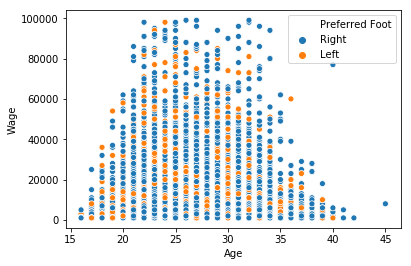

In [36]:
sns.scatterplot(x= 'Age', y="Wage", hue='Preferred Foot', data=train_data)

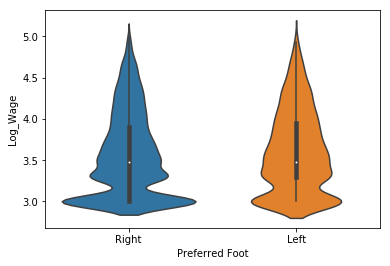

In [37]:
sns.violinplot(x='Preferred Foot', y="Log_Wage", data=train_data)

In [38]:
train_data["Preferred Right Foot"] = train_data['Preferred Foot'].apply(lambda x: 1 if x=='Right' else 0)
train_data.drop(['Preferred Foot'], axis=1, inplace=True)

### 15: Work Rate

In [39]:
train_data['Work Rate'].value_counts()


Medium/ Medium    7674
High/ Medium      2447
Medium/ High      1312
High/ High         753
Medium/ Low        680
High/ Low          522
Low/ Medium        354
Low/ High          338
Low/ Low            29
Name: Work Rate, dtype: int64

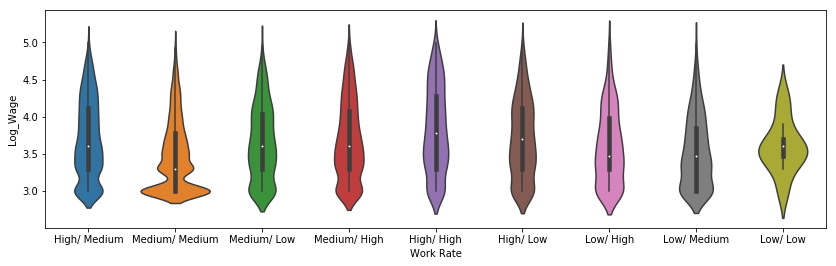

In [40]:
fig=plt.figure(figsize=(14,4))
sns.violinplot(x='Work Rate', y="Log_Wage", data=train_data)

Split "Work Rate" to two: Work Rate.1 & Work Rate.2, then change low/medium/high to numbers 1/2/3, 0 otherwise 

In [41]:
split_cols(train_data,"Work Rate",'/ ')  

In [42]:
train_data['Work Rate.3']= train_data['Work Rate.1'].apply(lambda x: level_to_number(x))
train_data['Work Rate.4']= train_data['Work Rate.2'].apply(lambda x: level_to_number(x))
#train_data['Total Work Rate'] = train_data['Work Rate.3'] + train_data['Work Rate.4']
train_data.drop(['Work Rate','Work Rate.1','Work Rate.2'], axis=1, inplace=True)

### 16: Body Type

In [43]:
train_data['Body Type'].value_counts()


Normal       8202
Lean         5012
Stocky        894
Akinfenwa       1
Name: Body Type, dtype: int64

In [44]:
train_data=train_data[train_data['Body Type']!='Akinfenwa']
train_data['Body Type'].value_counts()

Normal    8202
Lean      5012
Stocky     894
Name: Body Type, dtype: int64

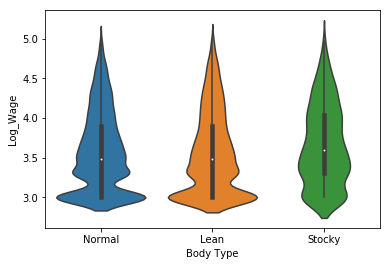

In [45]:
sns.violinplot(x='Body Type', y="Log_Wage", data=train_data)

In [46]:
one_hot = pd.get_dummies(train_data['Body Type'])
train_data = pd.concat([train_data,one_hot[["Lean","Normal"]]], axis=1) #Stocky = 0 in Normal & 0 in Lean
train_data.drop(['Body Type'], axis=1, inplace=True)
train_data = train_data.rename({'Normal':'Body Type - Normal', 'Lean':'Body Type - Lean'}, axis='columns')
train_data.head(5)

Unnamed: 0      ID           Name  Age     Nationality  Overall  Potential  \
0           1  184338    G. Bellusci   28           Italy       70         70   
1           2  215593        D. Kort   23          Poland       68         75   
2           3  179579       T. Nowak   32          Poland       65         65   
3           4  228009  Lee Gyu Seong   24  Korea Republic       57         62   
4           5   49045        K. Boyd   34        Scotland       72         72   

                 Club                                        Club Logo  \
0             Palermo    https://cdn.sofifa.org/teams/2/light/1843.png   
1        Wisła Kraków    https://cdn.sofifa.org/teams/2/light/1873.png   
2  Zagłębie Sosnowiec  https://cdn.sofifa.org/teams/2/light/111089.png   
3    Sangju Sangmu FC    https://cdn.sofifa.org/teams/2/light/2055.png   
4          Kilmarnock      https://cdn.sofifa.org/teams/2/light/82.png   

      Value  Wage  Special  International Reputation  Weak Foot  Skill Moves  \
0  EURO1.4M  3000     1694                      1.00       3.00         2.00   
1  EURO1.3M  3000     1697                      1.00       3.00         3.00   
2  EURO425K  2000     1790                      1.00       3.00         3.00   
3  EURO140K  1000     1516                      1.00       3.00         3.00   
4  EURO1.6M  7000     1703                      1.00       4.00         2.00   

  Real Face Position  Jersey Number     Joined Loaned From  \
0        No      RCB           2.00   3-Aug-17         NaN   
1        No      RDM           7.00  23-Jun-18         NaN   
2        No      CAM           6.00   1-Jul-16         NaN   
3        No      CAM          37.00   1-Jan-15         NaN   
4       Yes       ST           9.00   1-Jul-15         NaN   

  Contract Valid Until Height  Weight    LS    ST    RS    LW    LF    CF  \
0                 2020    6'0  176lbs  54+2  54+2  54+2  52+2  54+2  54+2   
1                 2019    5'9  143lbs  60+2  60+2  60+2  64+2  65+2  65+2   
2                 2019    5'7  159lbs  59+2  59+2  59+2  62+2  61+2  61+2   
3                 2019    5'8  146lbs  49+2  49+2  49+2  55+2  54+2  54+2   
4                 2019    6'1  183lbs  70+2  70+2  70+2  62+2  65+2  65+2   

     RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM  \
0  54+2  52+2  54+2  54+2  54+2  54+2  58+2  58+2  58+2  54+2  61+2  66+2   
1  65+2  64+2  66+2  66+2  66+2  64+2  63+2  63+2  63+2  64+2  53+2  52+2   
2  61+2  62+2  63+2  63+2  63+2  63+2  63+2  63+2  63+2  63+2  60+2  60+2   
3  54+2  55+2  56+2  56+2  56+2  57+2  55+2  55+2  55+2  57+2  53+2  52+2   
4  65+2  62+2  63+2  63+2  63+2  60+2  58+2  58+2  58+2  60+2  44+2  48+2   

    CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  \
0  66+2  66+2  61+2  63+2  68+2  68+2  68+2  63+2     38.00      40.00   
1  52+2  52+2  53+2  50+2  45+2  45+2  45+2  50+2     53.00      55.00   
2  60+2  60+2  60+2  58+2  56+2  56+2  56+2  58+2     61.00      49.00   
3  52+2  52+2  53+2  52+2  48+2  48+2  48+2  52+2     47.00      36.00   
4  48+2  48+2  44+2  42+2  46+2  46+2  46+2  42+2     55.00      75.00   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0            64.00         60.00    26.00      59.00  48.00       60.00   
1            49.00         67.00    47.00      67.00  65.00       60.00   
2            48.00         70.00    62.00      61.00  68.00       45.00   
3            37.00         63.00    39.00      61.00  44.00       39.00   
4            74.00         64.00    67.00      55.00  60.00       67.00   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0        61.00        60.00         54.00        58.00    60.00      63.00   
1        65.00        69.00         67.00        66.00    71.00      63.00   
2        69.00        67.00         70.00        73.00    78.00      57.00   
3        60.00        61.00         73.00        75.00    60.00      56.00   
4    

### 17: Real Face

In [47]:
train_data['Real Face'].value_counts()

No     12940
Yes     1168
Name: Real Face, dtype: int64

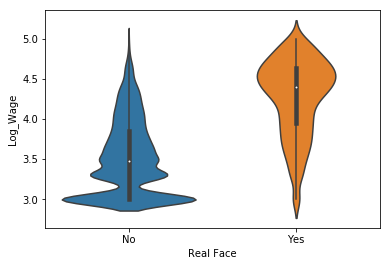

In [48]:
sns.violinplot(x='Real Face', y="Log_Wage", data=train_data)

In [49]:
train_data['Real Face Num'] = train_data['Real Face'].apply(lambda x: 1 if x=='Yes' else 0)
train_data['Real Face Num'].value_counts()

0    12940
1     1168
Name: Real Face Num, dtype: int64

### 18: Position

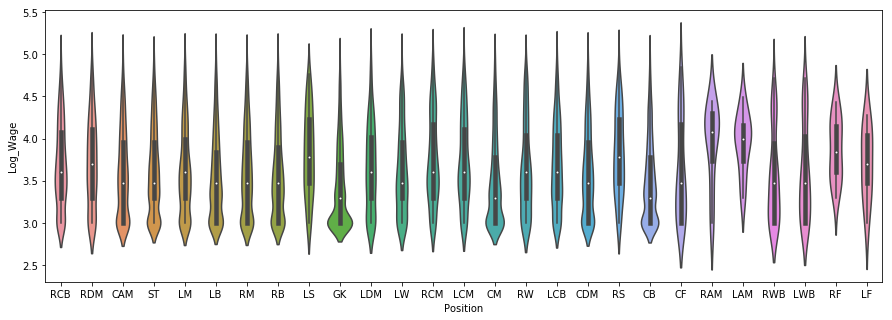

In [50]:
fig=plt.figure(figsize=(15,5))
sns.violinplot(x='Position', y="Log_Wage", data=train_data)

In [51]:
one_hot = pd.get_dummies(train_data['Position'])
add_to_col_name = ' -Position'
for col in one_hot:
    one_hot.rename({col:(col + add_to_col_name)}, axis = 'columns', inplace = True)
one_hot.drop(['LWB -Position'],axis = 1, inplace = True)
train_data = pd.concat([train_data,one_hot], axis=1) #Stocky = 0 in Normal & 0 in Lean
train_data.drop(['Position'], axis=1, inplace=True)

### 20 & 22 : Joined & Contract Valid Until

In [52]:
import datetime
#print('Year:', today.year)
def joined_time(value):
    if type(value) != str or len(value) == 0:
        return
    elif '9' in value[-2]:
        return (int('19'+value[-2:]))
    else:
        return (int('20'+value[-2:]))
        
train_data['Joined'].value_counts()
train_data['Joined Year'] = train_data['Joined'].apply(lambda x: joined_time(x))
train_data['Joined Year'].value_counts()

2,018.00    5260
2,017.00    3413
2,016.00    1733
2,015.00    1072
2,014.00     639
2,013.00     361
2,012.00     265
2,011.00     163
2,010.00      96
2,009.00      49
2,008.00      37
2,007.00      22
2,005.00      13
2,003.00      12
2,004.00      10
2,006.00      10
2,002.00       7
1,998.00       3
2,000.00       2
1,999.00       1
1,991.00       1
2,001.00       1
Name: Joined Year, dtype: int64

In [53]:
def year_contract_valid_until(value):
    if len(value) == 4:
        return(int(value))
    else:
        return (int('20'+value[-2:]))

train_data['Contract Until Year'] = train_data['Contract Valid Until'].apply(lambda x: year_contract_valid_until(x))
train_data['Contract Until Year'].value_counts()

2019    4624
2021    3440
2020    3201
2022    1155
2018     843
2023     827
2024      12
2025       4
2026       2
Name: Contract Until Year, dtype: int64

In [54]:
train_data['Years To Finish Contract'] = train_data['Contract Until Year'].apply(lambda x: x-2019) #num of years till finish
train_data['Years In Contract'] = train_data['Contract Until Year'] - train_data['Joined Year']  #num of years in the contract

In [55]:
train_data.head(10)

Unnamed: 0      ID           Name  Age     Nationality  Overall  Potential  \
0           1  184338    G. Bellusci   28           Italy       70         70   
1           2  215593        D. Kort   23          Poland       68         75   
2           3  179579       T. Nowak   32          Poland       65         65   
3           4  228009  Lee Gyu Seong   24  Korea Republic       57         62   
4           5   49045        K. Boyd   34        Scotland       72         72   
5           6  227895     K. Twardek   21          Canada       57         66   
6           7  244651       A. Kawai   18           Japan       55         68   
7           8  226295    B. Boutobba   19          France       64         73   
8           9  156017     V. Jalasto   32         Finland       64         64   
9          10  232381         Wesley   21          Brazil       77         85   

                  Club                                        Club Logo  \
0              Palermo    https://cdn.sofifa.org/teams/2/light/1843.png   
1         Wisła Kraków    https://cdn.sofifa.org/teams/2/light/1873.png   
2   Zagłębie Sosnowiec  https://cdn.sofifa.org/teams/2/light/111089.png   
3     Sangju Sangmu FC    https://cdn.sofifa.org/teams/2/light/2055.png   
4           Kilmarnock      https://cdn.sofifa.org/teams/2/light/82.png   
5         Sligo Rovers     https://cdn.sofifa.org/teams/2/light/563.png   
6  Sanfrecce Hiroshima  https://cdn.sofifa.org/teams/2/light/113157.png   
7      Montpellier HSC      https://cdn.sofifa.org/teams/2/light/70.png   
8         HJK Helsinki  https://cdn.sofifa.org/teams/2/light/100325.png   
9       Club Brugge KV     https://cdn.sofifa.org/teams/2/light/231.png   

       Value   Wage  Special  International Reputation  Weak Foot  \
0   EURO1.4M   3000     1694                      1.00       3.00   
1   EURO1.3M   3000     1697                      1.00       3.00   
2   EURO425K   2000     1790                      1.00       3.00   
3   EURO140K   1000     1516                      1.00       3.00   
4   EURO1.6M   7000     1703                      1.00       4.00   
5   EURO160K   1000     1485                      1.00       3.00   
6   EURO140K   1000     1399                      1.00       3.00   
7   EURO675K   3000     1517                      1.00       3.00   
8   EURO250K   1000     1620                      1.00       3.00   
9  EURO13.5M  20000     1831                      1.00       3.00   

   Skill Moves Real Face  Jersey Number     Joined Loaned From  \
0         2.00        No           2.00   3-Aug-17         NaN   
1         3.00        No           7.00  23-Jun-18         NaN   
2         3.00        No           6.00   1-Jul-16         NaN   
3         3.00        No          37.00   1-Jan-15         NaN   
4         2.00       Yes           9.00   1-Jul-15         NaN   
5         2.00        No          14.00   3-Jul-18         NaN   
6         2.00        No          26.00   1-Jan-18         NaN   
7         3.00        No          12.00  21-Sep-18         NaN   
8         2.00        No          15.00  10-Jan-16         NaN   
9         3.00        No           7.00  29-Jan-16         NaN   

  Contract Valid Until Height  Weight    LS    ST    RS    LW    LF    CF  \
0                 2020    6'0  176lbs  54+2  54+2  54+2  52+2  54+2  54+2   
1                 2019    5'9  143lbs  60+2  60+2  60+2  64+2  65+2  65+2   
2                 2019    5'7  159lbs  59+2  59+2  59+2  62+2  61+2  61+2   
3                 2019    5'8  146lbs  49+2  49+2  49+2  55+2  54+2  54+2   
4                 2019    6'1  183lbs  70+2  70+2  70+2  62+2  65+2  65+2   
5                 2019    6'1  174lbs  55+2  55+2  55+2  56+2  55+2  55+2   
6                 2020   5'10  143lbs  43+2  43+2  43+2  50+2  46+2  46+2   
7                 2023    5'8  143lbs  59+2  59+2  59+2  65+2  62+2  62+2   
8                 2018    6'0  183lbs  54+2  54+2  54+2  51+2  51+2  51+2   
9                 2023    6'

### 21.Loaned From - removing since there is only 938 values, 311 unique, max freq 16

In [56]:
#train_data['Loaned From'].value_counts()

In [57]:
train_data.drop('Loaned From', axis=1, inplace=True)

### 23. Height

In [58]:
train_data['Height'].value_counts()

6'0     2240
5'10    1929
5'9     1762
5'11    1683
6'2     1546
6'1     1486
6'3      753
5'8      747
5'7      687
6'4      577
5'6      254
6'5      192
5'5      115
6'6       68
5'4       24
5'3       15
6'7       15
6'8        8
5'2        3
6'9        2
5'1        2
Name: Height, dtype: int64

In [59]:
def height_value(height):
    x=12*int(height[0])+ int(height[2:])
    return(x)

train_data['Height_num']=train_data['Height'].apply(lambda x: height_value(x))
train_data['Height_num'].value_counts()

72    2240
70    1929
69    1762
71    1683
74    1546
73    1486
75     753
68     747
67     687
76     577
66     254
77     192
65     115
78      68
64      24
63      15
79      15
80       8
62       3
81       2
61       2
Name: Height_num, dtype: int64

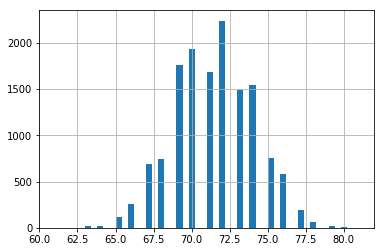

In [60]:
train_data['Height_num'].hist(bins=50)

### 24. Weight

In [61]:
train_data['Weight'].value_counts()

165lbs    1159
154lbs    1116
176lbs     816
172lbs     753
159lbs     746
161lbs     741
163lbs     695
170lbs     662
168lbs     656
174lbs     568
150lbs     529
157lbs     483
181lbs     437
183lbs     404
152lbs     391
179lbs     391
143lbs     391
148lbs     338
185lbs     338
187lbs     322
146lbs     284
141lbs     257
190lbs     218
194lbs     215
139lbs     169
192lbs     141
198lbs     117
196lbs     115
137lbs     110
132lbs     109
201lbs      73
134lbs      67
203lbs      53
205lbs      45
207lbs      39
130lbs      26
209lbs      26
128lbs      23
123lbs      15
212lbs      14
126lbs      10
216lbs       9
214lbs       8
121lbs       8
117lbs       5
218lbs       5
119lbs       3
225lbs       2
115lbs       1
223lbs       1
229lbs       1
110lbs       1
227lbs       1
236lbs       1
Name: Weight, dtype: int64

In [62]:
def weight_value(weight):
    return (int(weight[0:3]))

train_data['Weight_num']=train_data['Weight'].apply(lambda x: weight_value(x))
train_data['Weight_num'].value_counts()


165    1159
154    1116
176     816
172     753
159     746
161     741
163     695
170     662
168     656
174     568
150     529
157     483
181     437
183     404
152     391
143     391
179     391
185     338
148     338
187     322
146     284
141     257
190     218
194     215
139     169
192     141
198     117
196     115
137     110
132     109
201      73
134      67
203      53
205      45
207      39
209      26
130      26
128      23
123      15
212      14
126      10
216       9
214       8
121       8
218       5
117       5
119       3
225       2
223       1
115       1
236       1
229       1
110       1
227       1
Name: Weight_num, dtype: int64

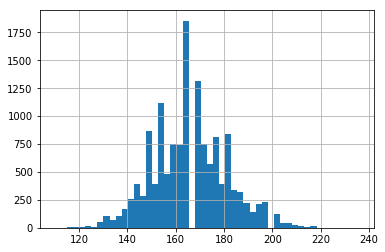

In [63]:
train_data['Weight_num'].hist(bins=50)


### BMI 

In [64]:
train_data['BMI']=train_data['Weight_num']/(train_data['Height_num'])**2

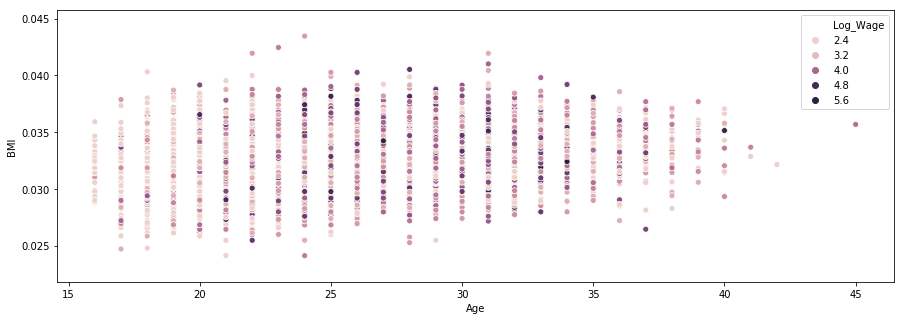

In [65]:
fig=plt.figure(figsize=(15,5))
sns.scatterplot(x='Age', y='BMI',hue='Log_Wage', data=train_data)

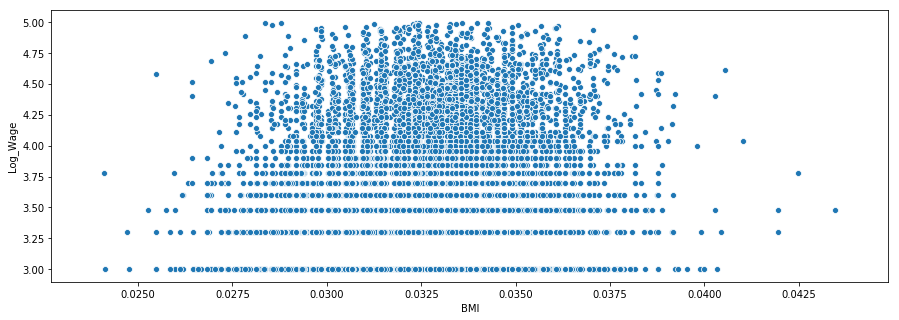

In [66]:
fig=plt.figure(figsize=(15,5))
sns.scatterplot(x='BMI', y='Log_Wage', data=train_data)

### 25-35: LS - RB
'LS', 'ST', 'RS','LW', 'LF', 'CF', 'RF',
'RW','LAM','CAM','RAM', 'LM', 'LCM', 'CM',
'RCM', 'RM','LWB', 'LDM','CDM','RDM', 'RWB',
'LB', 'LCB', 'CB','RCB', 'RB'


Split LS - RB to one number (adding between the two numbers) instade of num + num

In [67]:
list_to_split = ['LS', 'ST', 'RS','LW', 'LF', 'CF', 'RF',
                 'RW','LAM','CAM','RAM', 'LM', 'LCM', 'CM',
                 'RCM', 'RM','LWB', 'LDM','CDM','RDM', 'RWB',
                 'LB', 'LCB', 'CB','RCB', 'RB']
for col in list_to_split:
    split_and_adding_cols(train_data,col)
    train_data.drop([col], axis = 1, inplace = True)

### Removing duplicate/similar data at LS - RB features:
LS, ST, RS are the same --> Removing ST & RS
LF, CF, RF are the same --> Removing CF & RF 
LAM, CAM, RAM are the same --> Removing CAM & RAM
LCM, CM, RCM are the same --> Removing CM & RCM
LDM, CDM, RDM are the same -->Removing CDM & RDM
LCB, CB, RCB are the same --> Removing CB & RCB
Removing RW (like LW), RM(like LM) RWB (like LWB) & RB (like LB)

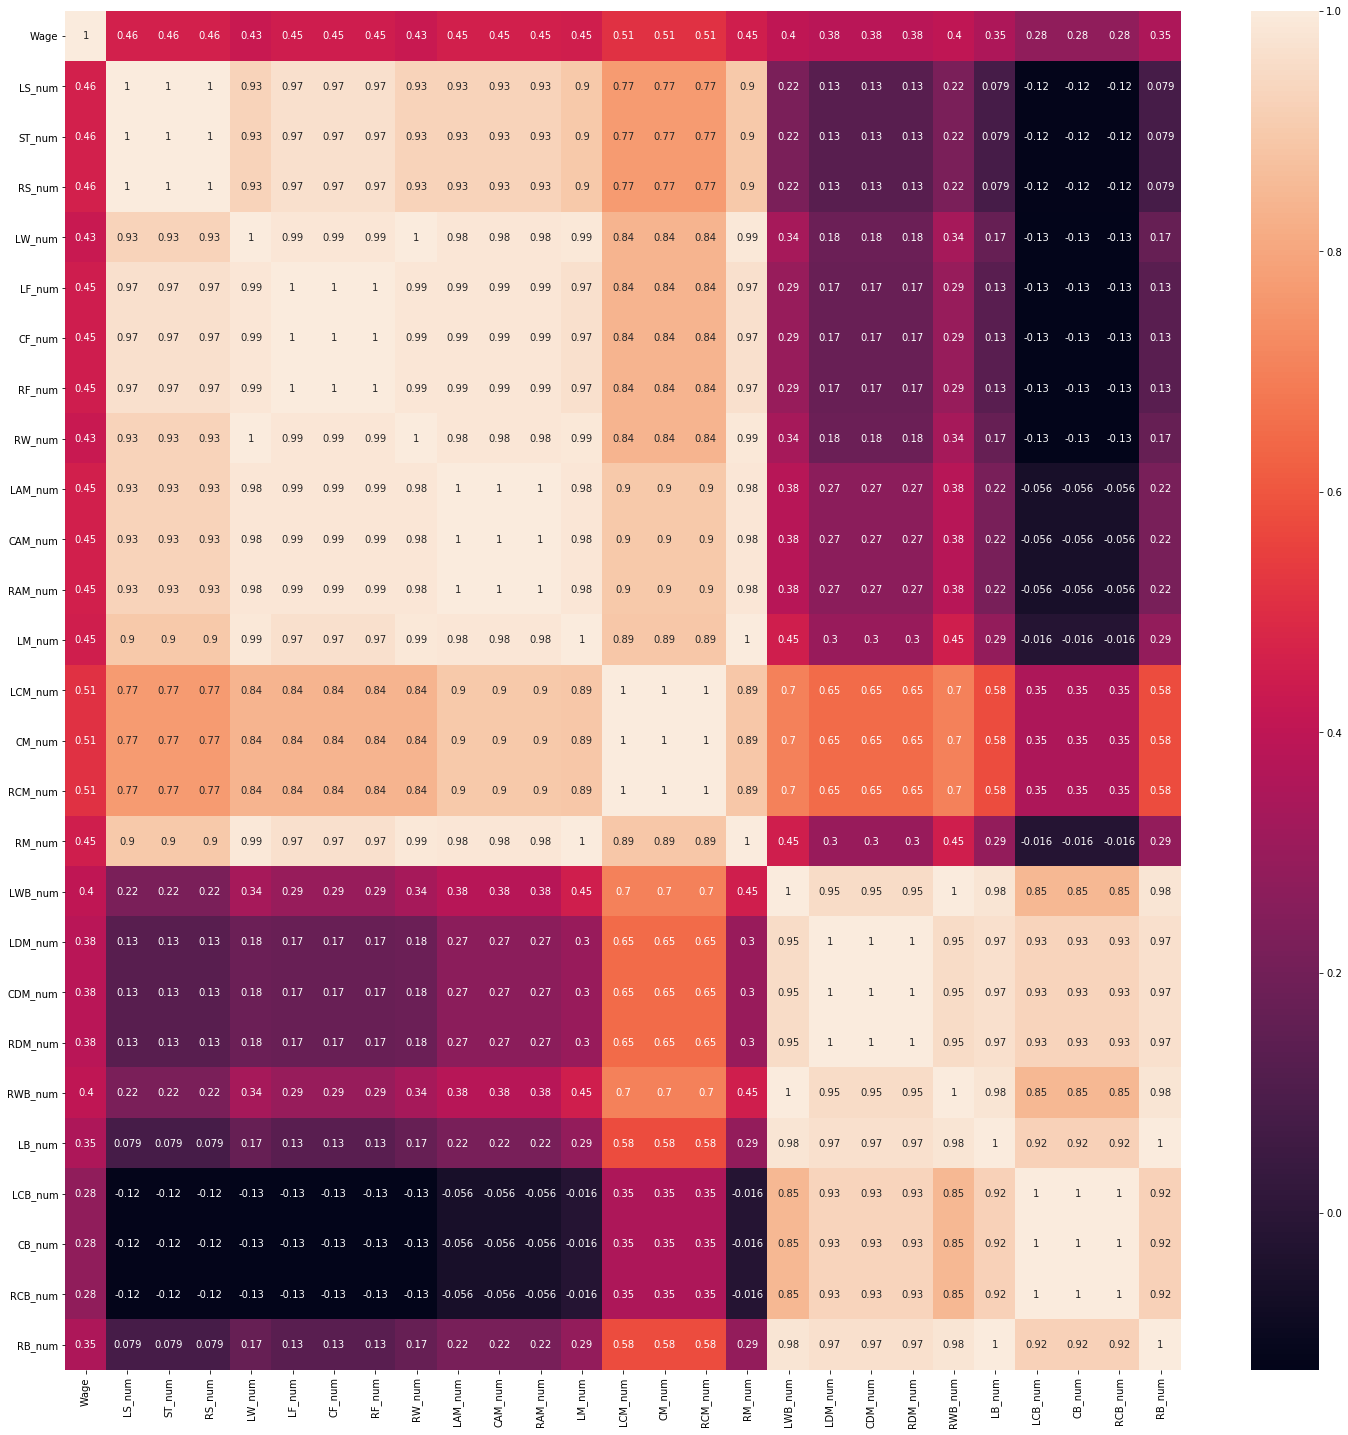

In [68]:
fig=plt.figure(figsize=(25,25))
sns.heatmap(train_data[['Wage','LS_num', 'ST_num', 'RS_num',
                            'LW_num', 'LF_num', 'CF_num', 'RF_num',
                            'RW_num','LAM_num','CAM_num',
                            'RAM_num', 'LM_num', 'LCM_num', 
                            'CM_num', 'RCM_num', 'RM_num',
                            'LWB_num', 'LDM_num','CDM_num',
                            'RDM_num', 'RWB_num', 'LB_num', 'LCB_num', 
                            'CB_num','RCB_num', 'RB_num']].corr(), annot=True)

### Removing ST & RS (the same like LS)

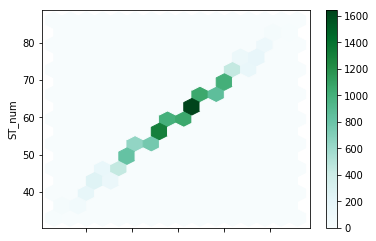

In [69]:
#sns.scatterplot(x='LS_num', y='ST_num', data=train_data)
train_data.plot.hexbin(x='LS_num', y='ST_num',gridsize=15, )

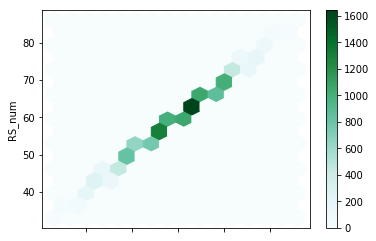

In [70]:
train_data.plot.hexbin(x='LS_num', y='RS_num',gridsize=15, )

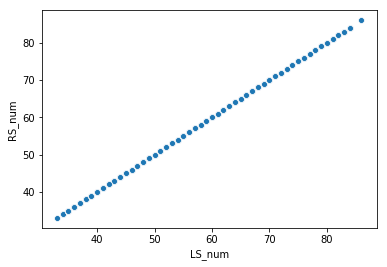

In [71]:
sns.scatterplot(x='LS_num', y='RS_num', data=train_data)

C:\Users\hadas\Anaconda3\envs\virenv3.7\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hadas\Anaconda3\envs\virenv3.7\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


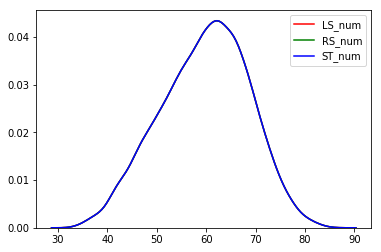

In [72]:
sns.kdeplot(train_data['LS_num'], label='LS_num',color='red')
sns.kdeplot(train_data['RS_num'], label='RS_num',color='green')
sns.kdeplot(train_data['ST_num'], label='ST_num',color='blue')


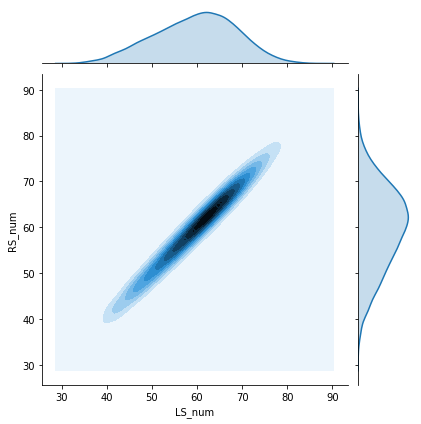

In [73]:
sns.jointplot(x='LS_num', y='RS_num', data=train_data, kind="kde")

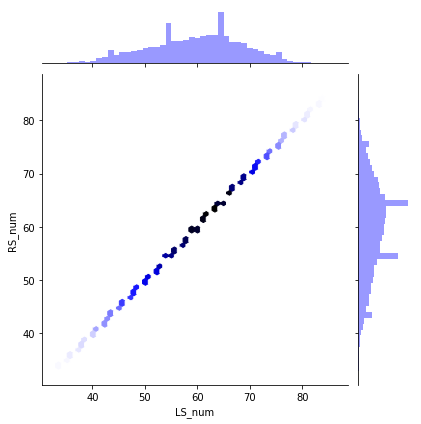

In [74]:
sns.jointplot(x=train_data['LS_num'], y=train_data['RS_num'], kind="hex", color="B");

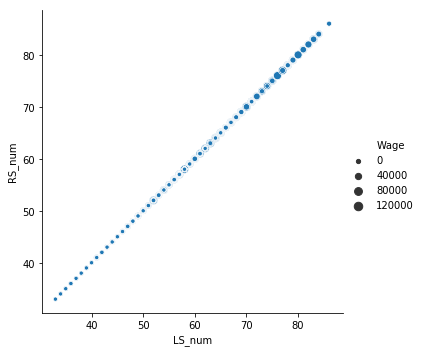

In [75]:
sns.relplot(x='LS_num', y='RS_num',size='Wage', data=train_data)

In [76]:
print(train_data.shape)
train_data.drop(['ST_num', 'RS_num'], axis=1, inplace=True)
print(train_data.shape)

(14108, 123)
(14108, 121)


### LF CF & RF  --> Removing CF & RF

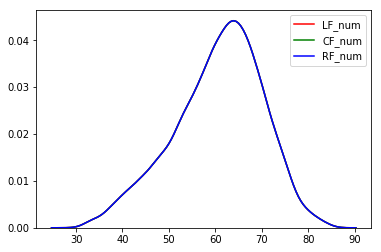

In [77]:
sns.kdeplot(train_data['LF_num'], label='LF_num',color='red')
sns.kdeplot(train_data['CF_num'], label='CF_num',color='green')
sns.kdeplot(train_data['RF_num'], label='RF_num',color='blue')

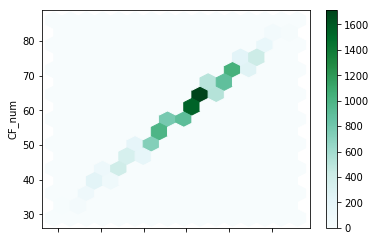

In [78]:
train_data.plot.hexbin(x='LF_num', y='CF_num',gridsize=15, )

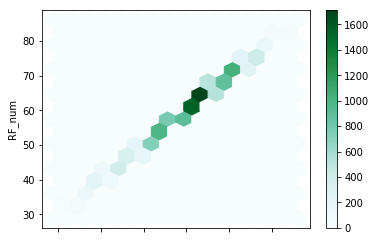

In [79]:
train_data.plot.hexbin(x='LF_num', y='RF_num',gridsize=15, )

In [80]:
print(train_data.shape)
train_data.drop(['CF_num', 'RF_num'], axis=1, inplace=True)
print(train_data.shape)

(14108, 121)
(14108, 119)


### Removing CAM & RAM

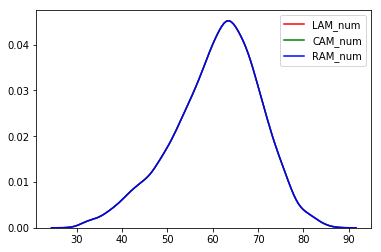

In [81]:
sns.kdeplot(train_data['LAM_num'], label='LAM_num',color='red')
sns.kdeplot(train_data['CAM_num'], label='CAM_num',color='green')
sns.kdeplot(train_data['RAM_num'], label='RAM_num',color='blue')

In [82]:
print(train_data.shape)
train_data.drop(['CAM_num', 'RAM_num'], axis=1, inplace=True)
print(train_data.shape)

(14108, 119)
(14108, 117)


### Removing CM & RCM


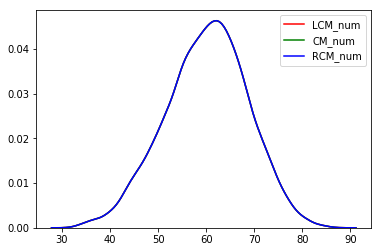

In [83]:
sns.kdeplot(train_data['LCM_num'], label='LCM_num',color='red')
sns.kdeplot(train_data['CM_num'], label='CM_num',color='green')
sns.kdeplot(train_data['RCM_num'], label='RCM_num',color='blue')

In [84]:
print(train_data.shape)
train_data.drop(['CM_num', 'RCM_num'], axis=1, inplace=True)
print(train_data.shape)

(14108, 117)
(14108, 115)


### Removing CDM & RDM

In [85]:
print(train_data.shape)
train_data.drop(['CDM_num', 'RDM_num'], axis=1, inplace=True)
print(train_data.shape)

(14108, 115)
(14108, 113)


### Removing CB & RCB

In [86]:
print(train_data.shape)
train_data.drop(['CB_num', 'RCB_num'], axis=1, inplace=True)
print(train_data.shape)

(14108, 113)
(14108, 111)


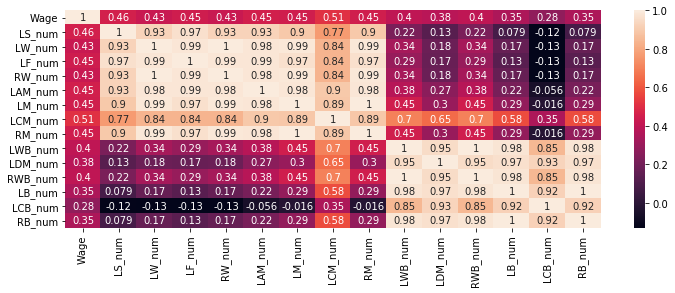

In [87]:
'''
LS, ST, RS are the same --> Removing ST & RS
LF, CF, RF are the same --> Removing CF & RF
LAM, CAM, RAM are the same --> Removing CAM & RAM
LCM, CM, RCM are the same --> Removing CM & RCM
LDM, CDM, RDM are the same -->Removing CDM & RDM
LCB, CB, RCB are the same --> Removing CB & RCB
'''
fig=plt.figure(figsize=(12,4))
sns.heatmap(train_data[['Wage','LS_num','LW_num', 'LF_num', 
                        'RW_num','LAM_num','LM_num', 'LCM_num', 
                        'RM_num', 'LWB_num', 'LDM_num',
                        'RWB_num', 'LB_num', 'LCB_num', 
                        'RB_num']].corr(), annot=True)

### Removing RW (like LW), RM(like LM) RWB (like LWB) & RB (like LB)

In [88]:
print(train_data.shape)
train_data.drop(['RW_num', 'RM_num','RWB_num','RB_num'], axis=1, inplace=True)
print(train_data.shape)

(14108, 111)
(14108, 107)


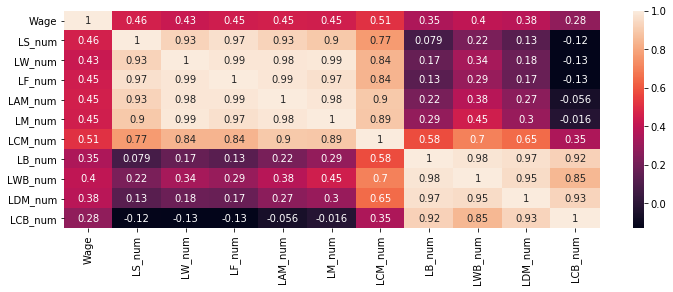

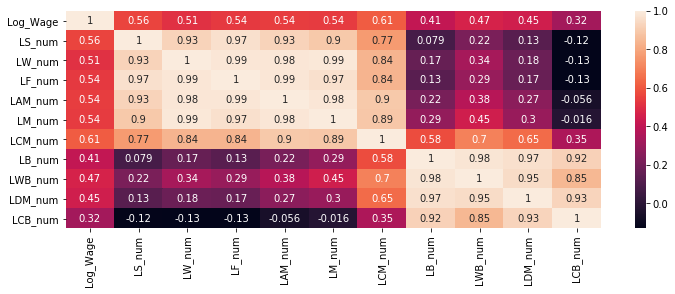

In [89]:
fig=plt.figure(figsize=(12,4))
sns.heatmap(train_data[['Wage','LS_num', 'LW_num', 'LF_num',
                        'LAM_num', 'LM_num', 'LCM_num', 
                        'LB_num','LWB_num', 'LDM_num','LCB_num']].corr(), annot=True)

fig=plt.figure(figsize=(12,4))
sns.heatmap(train_data[['Log_Wage','LS_num', 'LW_num', 'LF_num',
                        'LAM_num', 'LM_num', 'LCM_num', 
                        'LB_num','LWB_num', 'LDM_num','LCB_num']].corr(), annot=True)

In [90]:
train_data.drop(['LW_num','LF_num','LAM_num', 'LM_num', 'LB_num','LDM_num','LCB_num'], axis=1, inplace=True)

### 60-62: Marking, StandingTackle & SlidingTackle  --> removed SlidingTackle

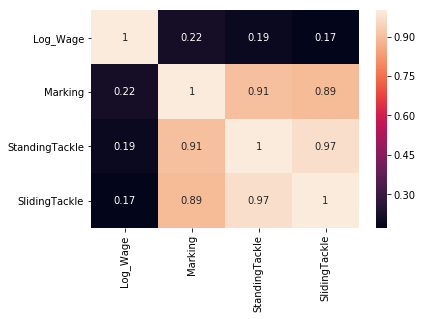

In [91]:
sns.heatmap(train_data[['Log_Wage','Marking', 'StandingTackle', 'SlidingTackle']].corr(), annot=True)

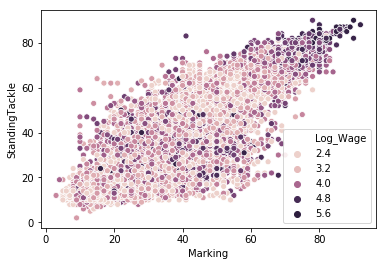

In [92]:
sns.scatterplot(x='Marking', y='StandingTackle',hue='Log_Wage', data=train_data)

In [93]:
train_data.drop('SlidingTackle', axis=1, inplace=True)

In [94]:
train_data.drop('StandingTackle', axis=1, inplace=True)

### 63-67: GKPositioning, GKReflexes, GKDiving, GKHandling, & GKKicking

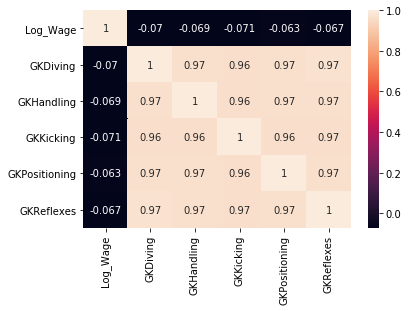

In [95]:
sns.heatmap(train_data[['Log_Wage','GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']].corr(), annot=True)

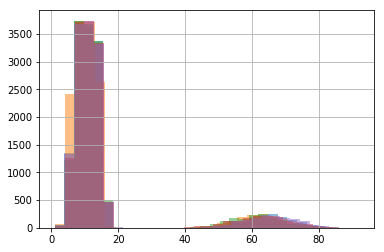

In [96]:
train_data['GKDiving'].hist(bins=30, alpha=0.5, label='GKDiving')
train_data['GKHandling'].hist(bins=30, alpha=0.5, label='GKHandling') #a bit differnet from others
train_data['GKKicking'].hist(bins=30, alpha=0.5, label='GKKicking')
train_data['GKPositioning'].hist(bins=30, alpha=0.5, label='GKPositioning')
train_data['GKReflexes'].hist(bins=30, alpha=0.5, label='GKReflexes')


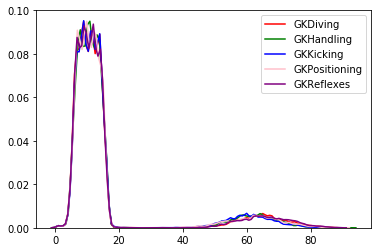

In [97]:
sns.kdeplot(train_data['GKDiving'], label='GKDiving',color='red')
sns.kdeplot(train_data['GKHandling'], label='GKHandling',color='green')
sns.kdeplot(train_data['GKKicking'], label='GKKicking',color='blue')
sns.kdeplot(train_data['GKPositioning'], label='GKPositioning',color='pink')
sns.kdeplot(train_data['GKReflexes'], label='GKReflexes',color='purple')

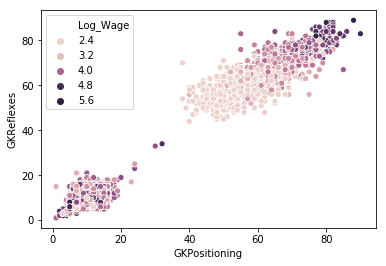

In [98]:
sns.scatterplot(x='GKPositioning', y='GKReflexes',hue='Log_Wage',data=train_data)

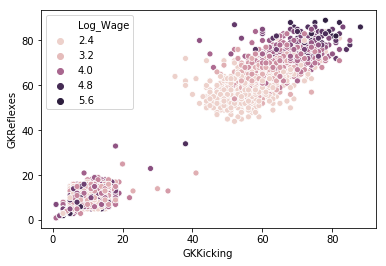

In [99]:
sns.scatterplot(x='GKKicking', y='GKReflexes',hue='Log_Wage', data=train_data)

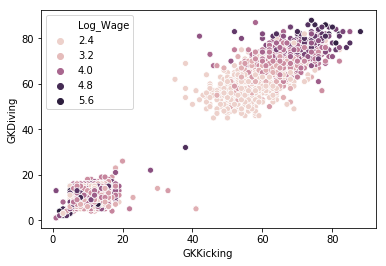

In [100]:
sns.scatterplot(x='GKKicking', y='GKDiving',hue='Log_Wage', data=train_data)

In [101]:
train_data.drop(['GKDiving','GKHandling','GKPositioning', 'GKReflexes'], axis=1, inplace=True)

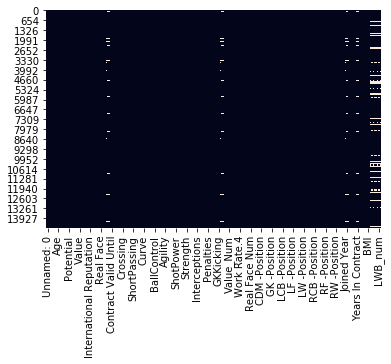

In [102]:
sns.heatmap(train_data.isnull(), cbar=False)

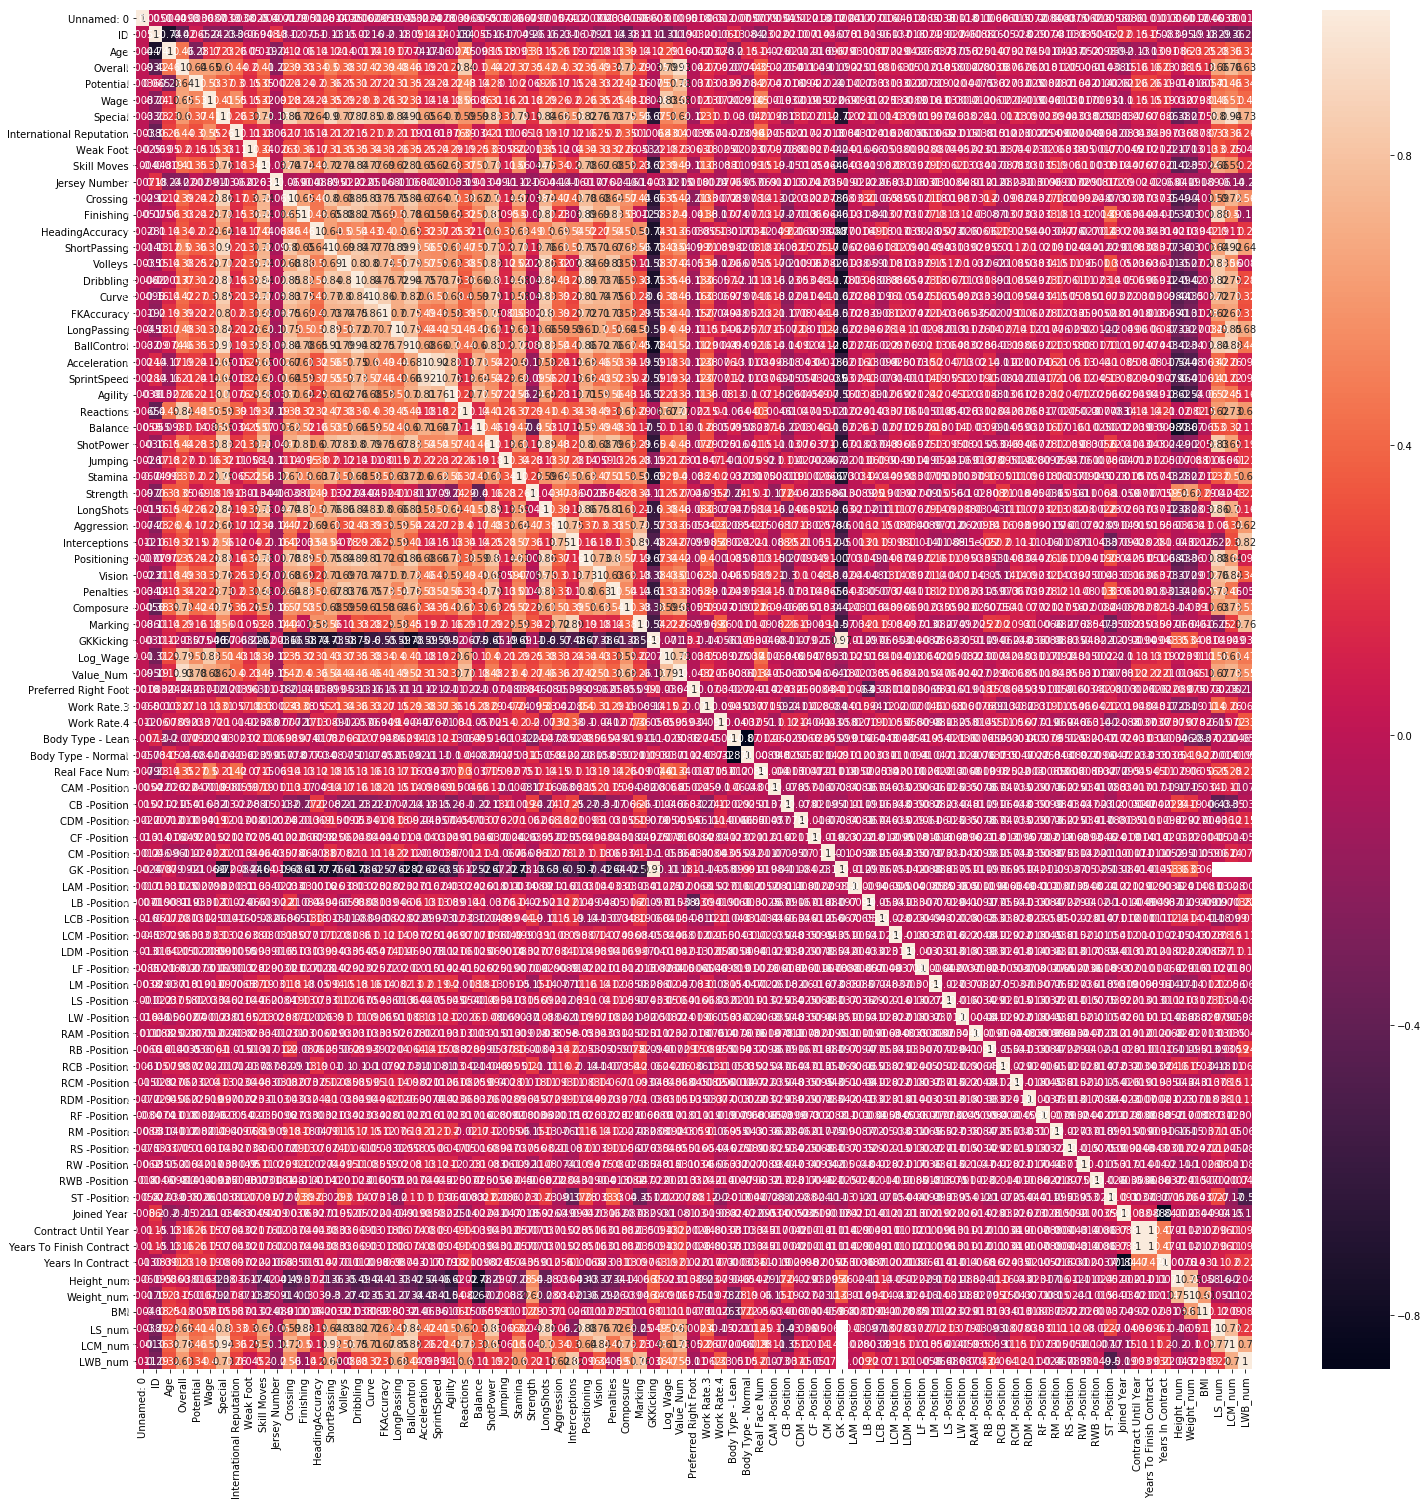

In [103]:
fig=plt.figure(figsize=(25,25))
sns.heatmap(train_data.corr(), annot=True)

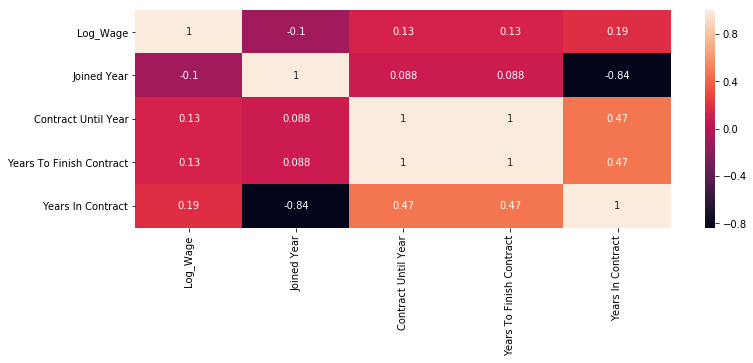

In [104]:
fig=plt.figure(figsize=(12,4))
sns.heatmap(train_data[['Log_Wage','Joined Year','Contract Until Year', 'Years To Finish Contract','Years In Contract']].corr(), annot=True)

In [105]:
train_data.drop(['Years To Finish Contract'], axis=1, inplace=True)

In [121]:
train_data.shape

(14108, 93)

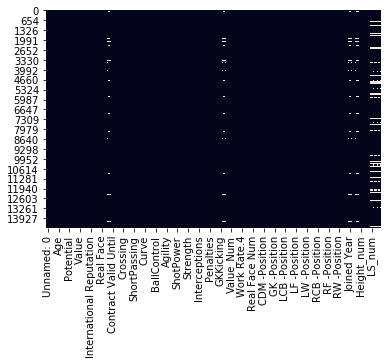

In [122]:
sns.heatmap(train_data.isnull(), cbar=False)

### Fill NaN on LS_num:

In [106]:
miss_data = train_data.isnull().sum()/train_data['ID'].count()*100
miss_data[miss_data !=0]

Joined               6.65
Release Clause       6.69
Joined Year          6.65
Years In Contract    6.65
LS_num              10.83
LCM_num             10.83
LWB_num             10.83
dtype: float64

In [107]:
train_data.describe()

Unnamed: 0         ID       Age   Overall  Potential      Wage  \
count   14,108.00  14,108.00 14,108.00 14,108.00  14,108.00 14,108.00   
mean     7,295.17 214,497.75     25.08     66.04      71.15  8,156.37   
std      4,206.23  30,008.80      4.67      6.69       5.97 12,800.44   
min          1.00      80.00     16.00     46.00      48.00  1,000.00   
25%      3,658.75 200,674.75     21.00     62.00      67.00  1,000.00   
50%      7,301.50 222,077.50     25.00     66.00      71.00  3,000.00   
75%     10,935.50 236,677.25     28.00     71.00      75.00  9,000.00   
max     14,565.00 246,620.00     45.00     90.00      93.00 99,000.00   

        Special  International Reputation  Weak Foot  Skill Moves  \
count 14,108.00                 14,108.00  14,108.00    14,108.00   
mean   1,595.80                      1.09       2.95         2.36   
std      268.79                      0.34       0.66         0.75   
min      731.00                      1.00       1.00         1.00   
25%    1,459.00                      1.00       3.00         2.00   
50%    1,633.00                      1.00       3.00         2.00   
75%    1,782.00                      1.00       3.00         3.00   
max    2,265.00                      5.00       5.00         5.00   

       Jersey Number  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
count      14,108.00 14,108.00  14,108.00        14,108.00     14,108.00   
mean           19.64     49.71      45.53            52.21         58.65   
std            15.92     18.14      19.32            17.18         14.47   
min             1.00      6.00       2.00             4.00          7.00   
25%             8.00     38.00      30.00            45.00         54.00   
50%            17.00     54.00      49.00            55.00         62.00   
75%            26.00     64.00      61.00            64.00         68.00   
max            99.00     92.00      88.00            94.00         90.00   

        Volleys  Dribbling     Curve  FKAccuracy  LongPassing  BallControl  \
count 14,108.00  14,108.00 14,108.00   14,108.00    14,108.00    14,108.00   
mean      42.80      55.38     47.13       42.86        52.68        58.35   
std       17.47      18.68     18.22       17.29        15.17        16.43   
min        4.00       4.00      6.00        4.00         9.00         5.00   
25%       30.00      49.00     34.00       31.00        43.00        54.00   
50%       44.00      61.00     48.00       41.00        56.00        63.00   
75%       56.00      68.00     62.00       56.00        64.00        69.00   
max       88.00      93.00     94.00       93.00        89.00        90.00   

       Acceleration  SprintSpeed   Agility  Reactions   Balance  ShotPower  \
count     14,108.00    14,108.00 14,108.00  14,108.00 14,108.00  14,108.00   
mean          64.65        64.74     63.56      61.62     63.98      55.43   
std           14.90        14.61     14.69       8.78     14.11      17.07   
min           12.00        12.00     14.00      30.00     16.00       2.00   
25%           57.00        57.00     56.00      56.00     56.00      46.00   
50%           67.00        67.00     66.00      62.00     66.00      59.00   
75%           75.00        75.00     74.00      68.00     74.00      68.00   
max           97.00        96.00     95.00      88.00     96.00      94.00   

        Jumping   Stamina  Strength  LongShots  Aggression  Interceptions  \
count 14,108.00 14,108.00 14,108.00  14,108.00   14,108.00      14,108.00   
mean      65.03     63.21     65.24      47.09       55.84          46.65   
std       11.81     15.74     12.55      19.06       17.24          20.55   
min       15.00     12.00     17.00       4.00       11.00           4.00   
25%       58.00     56.00     58.00      33.00       44.00          26.00   
50%       66.00     66.00     66.00      51.00       59.00          52.00   
75%       73.00     74.00     74.00      62.00       69.00          64.00   
max       94.00     

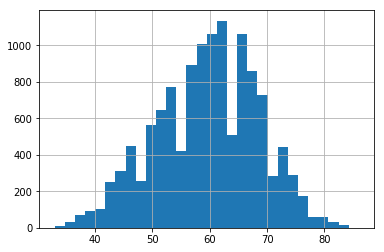

In [108]:
train_data['LS_num'].hist(bins=30)

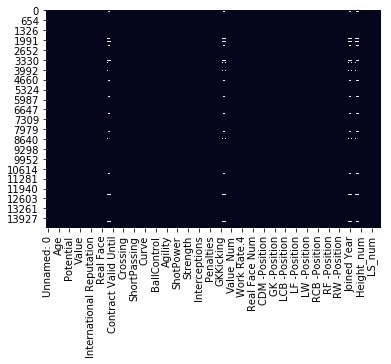

In [109]:
fill_num={'LS_num':60, 'LW_num':61, 'LF_num':61, 'LAM_num':61, 'LM_num':62, 'LCM_num':60, 'LWB_num':59,'LDM_num':59,'LB_num':59, 'LCB_num':57}
train_data.fillna(value=fill_num, inplace=True)
sns.heatmap(train_data.isnull(), cbar=False)

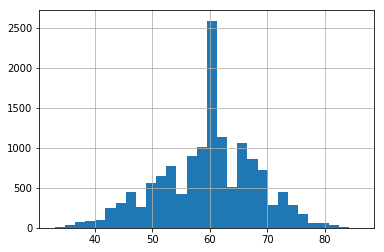

In [110]:
train_data['LS_num'].hist(bins=30)